In [20]:
# Import required libraries
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialising Faker
fake = Faker()

# Seeding the random number for consistency and reproduciblity
np.random.seed(7)
random.seed(7)

In [21]:
# Synthetic Dataset to simulate customer activity on an e-commerce platform
# The num_rows represents the number of customers being generated
num_rows = 1000

# Creating empty lists to store data
customer_ids = [fake.uuid4() for _ in range(num_rows)]  # Unique customer IDs
ages = [random.randint(18, 60) for _ in range(num_rows)] # Ages between 18 and 65
genders = [random.choice(['Male', 'Female']) for _ in range(num_rows)] # Random genders
locations = [fake.city() for _ in range(num_rows)] # Random city names
device_types = [random.choice(['Mobile', 'Desktop', 'Tablet']) for _ in range(num_rows)] # Device type

# Browsing and purchase behavior
session_counts = [random.randint(1, 50) for _ in range(num_rows)] # Number of browsing sessions
time_spent = [round(random.uniform(5, 300), 2) for _ in range(num_rows)] # Time spent (in minutes)
products_viewed = [random.randint(1, 20) for _ in range(num_rows)] # Number of products viewed
purchases = [random.randint(0, 5) for _ in range(num_rows)] # Number of purchases
purchase_amounts = [round(purchases[i] * random.uniform(10, 500), 2) for i in range(num_rows)] # Total amount spent
last_activity_dates = [fake.date_between(start_date='-1y', end_date='today') for _ in range(num_rows)] # Last activity dates

In [22]:
# Combining data into a DataFrame using Pandas
# Create a DataFrame from the lists
data = pd.DataFrame({
    'Customer ID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Location': locations,
    'Device Type': device_types,
    'Session Count': session_counts,
    'Time Spent (mins)': time_spent,
    'Products Viewed': products_viewed,
    'Purchases': purchases,
    'Total Amount Spent': purchase_amounts,
    'Last Activity Date': last_activity_dates
})

# Preview the first few rows of the syntheticdataset
data.head()

# Import the os module to handle directories
import os

# Ensure the 'data/' directory exists
os.makedirs('data', exist_ok=True)

# Save the dataset to the 'data/' folder
data.to_csv('data/ecommerce_data.csv', index=False)

print("Dataset generated and saved successfully!")


Dataset generated and saved successfully!


In [23]:
#EDA
# Load the dataset
data = pd.read_csv('data/ecommerce_data.csv')

# Preview the first five rows
#data.head()

#data.info()

#data.describe()

# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


#Remove duplicates if any exist
#if duplicate_count > 0:
    #data = data.drop_duplicates()
    #print(f"Duplicates removed. New dataset shape: {data.shape}")


Number of duplicate rows: 0


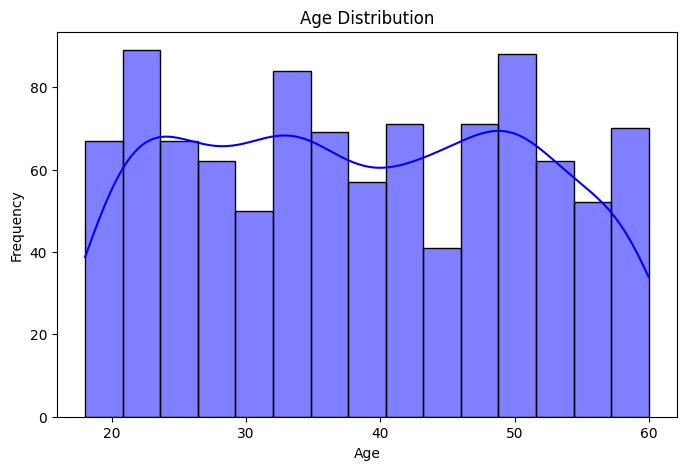

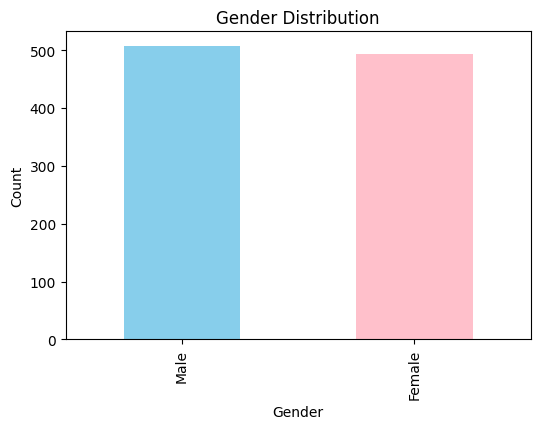

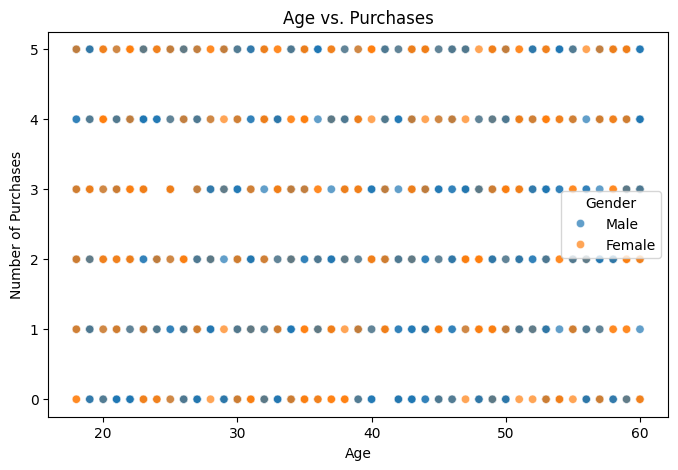

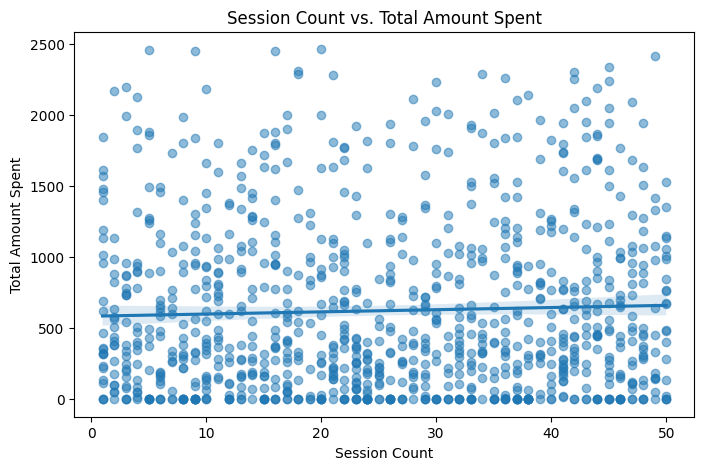

<function matplotlib.pyplot.show(close=None, block=None)>

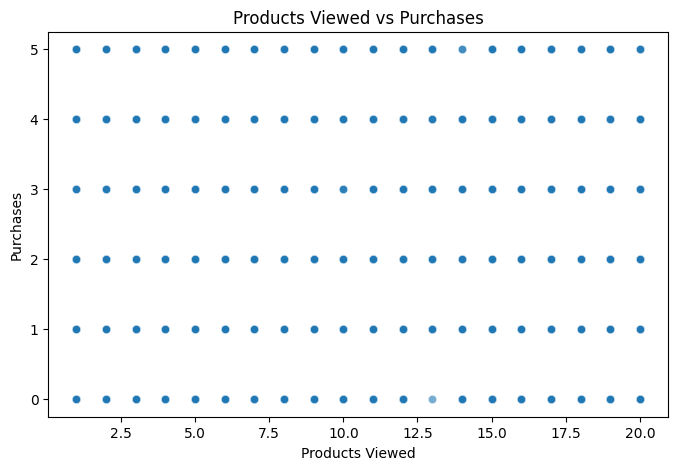

In [24]:
# Visualising Distributions to reveal insights and uncover patterns

# Age distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=15, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Gender distribution
plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Analyse relationships

# Age vs Purchases grouped by Gender
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Purchases', data=data, hue='Gender', alpha=0.7)
plt.title('Age vs. Purchases')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.show()

# Session Count vs Total Amount Spent
plt.figure(figsize=(8, 5))
sns.regplot(x='Session Count', y='Total Amount Spent', data=data, scatter_kws={'alpha':0.5})
plt.title('Session Count vs. Total Amount Spent')
plt.xlabel('Session Count')
plt.ylabel('Total Amount Spent')
plt.show()


# Products Viewed vs Purchases
plt.figure(figsize=(8,5))
sns.scatterplot(x='Products Viewed', y='Purchases', data=data, alpha=0.6)
plt.title('Products Viewed vs Purchases')
plt.xlabel('Products Viewed')
plt.ylabel('Purchases')
plt.show


In [25]:
# Save the cleaned dataset
data.to_csv('data/cleaned_ecommerce_data.csv', index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [26]:
#Handling missing values and Outliers

# Check for missing values in each column
print("Missing values per column:\n", data.isnull().sum())


# Calculate the IQR for the 'Purchases' column
#Q1 = data['Purchases'].quantile(0.25)
#Q3 = data['Purchases'].quantile(0.75)
#IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
#data_cleaned = data[(data['Purchases'] >= lower_bound) & (data['Purchases'] <= upper_bound)]

#print(f"Data after removing outliers: {data_cleaned.shape}")


Missing values per column:
 Customer ID           0
Age                   0
Gender                0
Location              0
Device Type           0
Session Count         0
Time Spent (mins)     0
Products Viewed       0
Purchases             0
Total Amount Spent    0
Last Activity Date    0
dtype: int64


In [27]:
# Dropping irrelevant columns after EDA & Visualisations
data_cleaned = data.drop(columns=['Customer ID'])
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1000 non-null   int64  
 1   Gender              1000 non-null   object 
 2   Location            1000 non-null   object 
 3   Device Type         1000 non-null   object 
 4   Session Count       1000 non-null   int64  
 5   Time Spent (mins)   1000 non-null   float64
 6   Products Viewed     1000 non-null   int64  
 7   Purchases           1000 non-null   int64  
 8   Total Amount Spent  1000 non-null   float64
 9   Last Activity Date  1000 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None


In [28]:
# Feature engineering
# RFM Scores

# Create a new feature for Purchase Frequency (Purchases per Session)
data_cleaned['Purchase Frequency'] = np.where(data_cleaned['Session Count'] ==0, 0,
data_cleaned['Purchases'] / data_cleaned['Session Count'])

# Create a new feature to classify high-value customers based on total amount spent
high_value_threshold = 400   # Define a threshold for high-value customers
data_cleaned['High Value Customer'] = data_cleaned['Total Amount Spent'] > high_value_threshold

# Convert it to a boolean category (True/False)
data_cleaned['High Value Customer'] = data_cleaned['High Value Customer'].astype(int)



# Normalising the Data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
columns_to_scale = ['Age', 'Session Count', 'Time Spent (mins)', 'Purchases', 'Total Amount Spent']

# Standardize the selected columns
data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])

# Verify the scaling
data_cleaned[columns_to_scale].head()


,Age,Session Count,Time Spent (mins),Purchases,Total Amount Spent
0,-0.041906,-0.239168,-0.498743,0.297747,-0.218769
1,-0.930085,1.334757,-1.500575,-1.453706,-1.040692
2,0.361812,0.513579,1.637692,1.465383,1.513968
3,1.653708,1.540052,-0.804297,1.465383,-0.417654
4,-1.414546,1.334757,0.548941,-0.869889,-0.718640


In [29]:
# Define the churn threshold (customers who haven't made a purchase since June 1, 2024)
churn_threshold = pd.to_datetime('2024-06-01')  # Ensure this is a datetime object

# Label churned customers based on 'Last Activity Date'
data_cleaned['Last Activity Date'] = pd.to_datetime(data_cleaned['Last Activity Date'], errors = 'coerce')
data_cleaned = data_cleaned.dropna(subset=['Last Activity Date'])
data_cleaned['Churned'] = data_cleaned['Last Activity Date'] < churn_threshold

# Check the first few rows to ensure 'Churned' is correctly labeled
print(data_cleaned[['Last Activity Date', 'Churned']].head())


  Last Activity Date  Churned
0         2024-06-04    False
1         2024-07-06    False
2         2024-01-03     True
3         2024-09-30    False
4         2024-08-17    False


In [50]:
#print(data_cleaned.columns)

# Define features (X) and target (y) for churn prediction
X_churn = data_cleaned.drop(columns=['Last Activity Date', 'Churned'])  # Remove irrelevant columns
X_churn = X_churn.astype(float)

y_churn = data_cleaned['Churned']


print(X_churn.dtypes)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.2, random_state=3)

# Train a classification model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
churn_model = RandomForestClassifier(random_state=3, class_weight='balanced')
churn_model.fit(X_train_churn, y_train_churn)

# Predict churn on test data
y_pred_churn = churn_model.predict(X_test_churn)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test_churn, y_pred_churn)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_churn, y_pred_churn)}")

from sklearn.model_selection import  GridSearchCV

# Define the parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced']
}
'''
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train_churn, y_train_churn)

# Use the best model
best_rf = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)

# Step 6: Evaluate the best model found by GridSearchCV
y_pred_best = best_rf.predict(X_test_churn)
print("Accuracy (Best Model): ", accuracy_score(y_test_churn, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test_churn, y_pred_best))
'''

Age                        float64
Session Count              float64
Time Spent (mins)          float64
Products Viewed            float64
Purchases                  float64
                            ...   
Location_Woodstad          float64
Location_Youngport         float64
Location_Yvonnestad        float64
Location_Zacharyfort       float64
Location_Zimmermanville    float64
Length: 977, dtype: object
Accuracy: 0.465
Confusion Matrix:
 [[69 40]
 [67 24]]


'\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=RandomForestClassifier(random_state=42),\n    param_grid=param_grid,\n    cv=3,\n    scoring=\'accuracy\',\n    n_jobs=-1,\n    verbose=2\n)\n\n# Fit the grid search\ngrid_search.fit(X_train_churn, y_train_churn)\n\n# Use the best model\nbest_rf = grid_search.best_estimator_\nprint("Best Parameters: ", grid_search.best_params_)\n\n# Step 6: Evaluate the best model found by GridSearchCV\ny_pred_best = best_rf.predict(X_test_churn)\nprint("Accuracy (Best Model): ", accuracy_score(y_test_churn, y_pred_best))\nprint("Confusion Matrix (Best Model):\n", confusion_matrix(y_test_churn, y_pred_best))\n'

In [51]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get the predicted probabilities for the positive class
# Assuming best_rf is your trained model and X_test_churn is your test set
y_probs = best_rf.predict_proba(X_test_churn)[:, 1]  # Probability of the positive class (churn)

# Step 2: Compute precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_churn, y_probs)

# Step 3: Calculate Precision-Recall AUC
pr_auc = auc(recall, precision)
print("Precision-Recall AUC: ", pr_auc)

# Step 4: (Optional) Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


NameError: name 'best_rf' is not defined

In [52]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Check the current columns in the dataset
print("Columns in data_cleaned before feature selection:")
print(data_cleaned.columns)

# Ensure all columns are numeric or properly encoded
print("Data types before feature selection:")
print(data_cleaned.dtypes)

# One-Hot Encoding for categorical columns (e.g., 'Location')
# You can also use LabelEncoder if you prefer integer encoding
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Define the target variable and features
X_sales = data_cleaned.drop(columns=['Total Amount Spent', 'Last Activity Date', 'Churned'])  # Features
y_sales = data_cleaned['Total Amount Spent']  # Target variable

# Ensure features are numeric
print("Feature Data Types after encoding:")
print(X_sales.dtypes)

# Split the data into training and testing sets
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42
)

# Train the XGBoost regression model
xgb_model = XGBRegressor(
    n_estimators=200,  # Number of trees
    max_depth=6,        # Maximum depth of a tree
    learning_rate=0.1,  # Step size for each tree
    subsample=0.8,      # Use 80% of samples for each tree
    colsample_bytree=0.8,  # Use 80% of features for each tree
    random_state=42
)
xgb_model.fit(X_train_sales, y_train_sales)

# Predict on the test set
y_pred_sales = xgb_model.predict(X_test_sales)

# Evaluate the model
mae = mean_absolute_error(y_test_sales, y_pred_sales)
mse = mean_squared_error(y_test_sales, y_pred_sales)
r2 = r2_score(y_test_sales, y_pred_sales)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")



from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor  # or any model you're using

# Define the model
model = RandomForestRegressor()

# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X_churn, y_churn, cv=5, scoring='neg_mean_squared_error')

# Since the scores are negative (because MSE is a loss function), we negate them to get positive values
cv_scores = -cv_scores

print("Cross-Validation MSE Scores: ", cv_scores)
print("Mean CV MSE: ", cv_scores.mean())


Columns in data_cleaned before feature selection:
Index(['Age', 'Session Count', 'Time Spent (mins)', 'Products Viewed',
       'Purchases', 'Total Amount Spent', 'Last Activity Date',
       'Purchase Frequency', 'High Value Customer', 'Churned',
       ...
       'Location_Wilsonstad', 'Location_Wolfefurt', 'Location_Wolfemouth',
       'Location_Woodardmouth', 'Location_Woodfurt', 'Location_Woodstad',
       'Location_Youngport', 'Location_Yvonnestad', 'Location_Zacharyfort',
       'Location_Zimmermanville'],
      dtype='object', length=979)
Data types before feature selection:
Age                        float64
Session Count              float64
Time Spent (mins)          float64
Products Viewed              int64
Purchases                  float64
                            ...   
Location_Woodstad             bool
Location_Youngport            bool
Location_Yvonnestad           bool
Location_Zacharyfort          bool
Location_Zimmermanville       bool
Length: 979, dtype: objec